# Temperature Forecast Project using ML
#### Problem Statement:
##### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Loading libraries

In [107]:
# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# importing ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ,ExtraTreesRegressor

# Metrics and model selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV

# Saving model
import joblib

### Loading dataset

In [46]:
df= pd.read_csv("temperature.csv",parse_dates=['Date'])
pd.set_option("display.max_columns",None)
# Reading top 5 rows
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [47]:
# Checking the last rows
df.tail(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaT,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [48]:
# checking the rows and columns of dataset
print("Dataset contains {} rows and {} columns.".format(len(df),len(df.columns)))

Dataset contains 7752 rows and 25 columns.


In [49]:
# checking the columns
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

## Attribute Information:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

There are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature



In [50]:
# Let's check the data type
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [51]:
# Let's check full information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

###### Observations :-
1. Total 7752 entries i 25 columns.
2. All columns are float in nature while 1 is datetime.
3. Null values present in many columns.

In [52]:
# Checking null values

if df.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

Null values present in dataset


In [53]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

###### Observations:-
1. In many columns 75 null values are present ,it ay be that all these same null values may have same row index,we will check it further.
2. A few columns are not having null values ,while those having are having similar size null values.

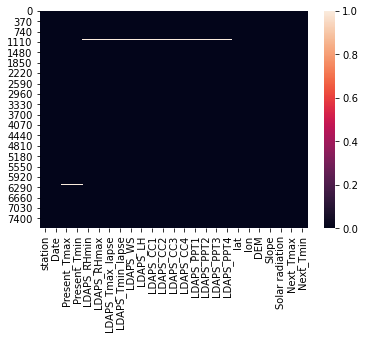

In [54]:
# checking heatmap for null values
sns.heatmap(df.isnull())

###### From the heatmap ,it is clear that null values present in different columns are present in same row indexes. 

In [55]:
# Let's check the duplicate values in data
if df.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [56]:
# Let's check features description
df.describe()    

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


###### Observations:-
1. Some columns having difference in mean and median like LDAPS_RHmin,LDAPS_LH,LDAPS_PPTI etc.
2. While columns like LDAPS_LH,LDAPS_WS,LDAPS_PPT12, LDAPS_PPT2, LDAPS_PPT3 etc are having great difference in 75th and 100th percentile ,means there are a lot of outliers in dataset.
3. Columns like Solar-radiation ,DEM are having high standard deviation .

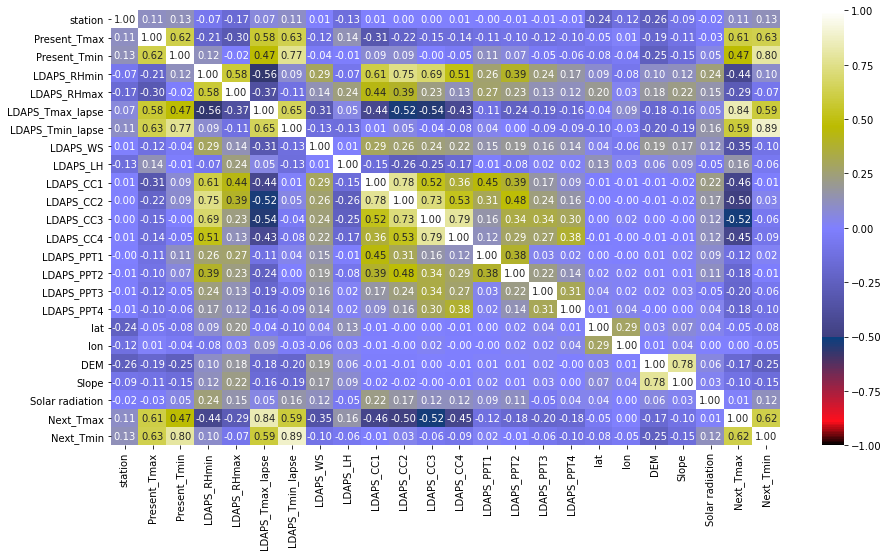

In [57]:
# plotting correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='gist_stern',annot=True,fmt=".2f",vmin=-1,
            vmax=1, center= 0 , linecolor='white')

##### Observations:- 
1. Dataset contains` 2` target variables and they are sharing a bond of `.62` correlaton strength with each other.
2. Target `column Next_Tmin` is having strong positive correlaton with `LDAPS_Tmin_lapse, Present_Tmin`.
3. Target `column Next_Tmax` is having strong positive correlation with `Present_Tmax, LDAPS_Tmax_lapse`.
4. There is presence of `multicollinearity` in many columns.

###### As there are a lot of null values and  multicollinarity in many columns ,treating these is necessary otherwise accuracy of model will not be good.

In [58]:
# Treating null values.
# using heatmap we find that null values are sharing same row indexes.

df1=df.dropna(axis=0,how='any')

In [59]:
# Checking shape
print("Dataset before dropping null values - ",df.shape)
print('\n')
print("Dataset after dropping null values - ",df1.shape)

Dataset before dropping null values -  (7752, 25)


Dataset after dropping null values -  (7588, 25)


In [60]:
print("Percentage loss of data treating null values",round((len(df)-len(df1))/len(df)*100,2),"%")

Percentage loss of data treating null values 2.12 %


In [61]:
# checking null values
df1.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

###### So we have successfully removed all null values.

In [62]:
df1['year']=df1['Date'].apply(lambda x:x.year)
df1['month']=df1['Date'].apply(lambda x:x.month)
df1.drop(['Date'],axis=1,inplace=True)

In [63]:
df1.head(4)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6


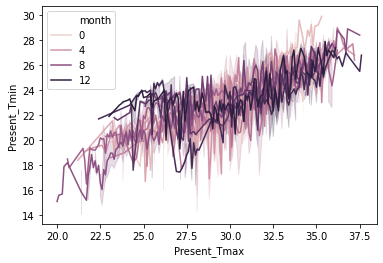

In [64]:
sns.lineplot(x='Present_Tmax',y='Present_Tmin',hue='month',data=df1)

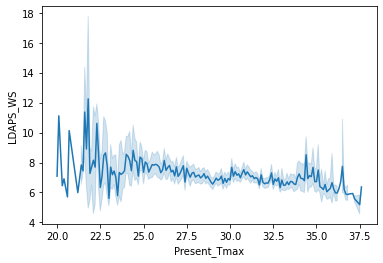

In [65]:
sns.lineplot(x='Present_Tmax',y='LDAPS_WS',data=df1)

##### When wind speed is fluctuating then maximum temperature remins near 20-22 while the speed becomes constant then temperature starts increasing  and wind speed starts decreasing.

Text(0.5, 1.0, 'Present_Tmin Vs LDAPS_WS')

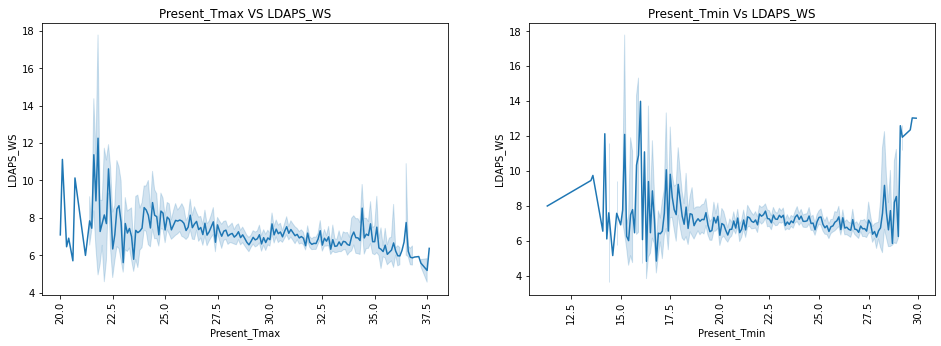

In [66]:
f=plt.figure(figsize=(16,5))
f.add_subplot(1,2,1)
sns.lineplot(x='Present_Tmax',y='LDAPS_WS',data=df1)
plt.xticks(rotation=90)
plt.title("Present_Tmax VS LDAPS_WS")

f.add_subplot(1,2,2)
sns.lineplot(x='Present_Tmin',y='LDAPS_WS',data=df1)
plt.xticks(rotation=90)
plt.title("Present_Tmin Vs LDAPS_WS")

In [67]:
df1.head(3)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,month
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6


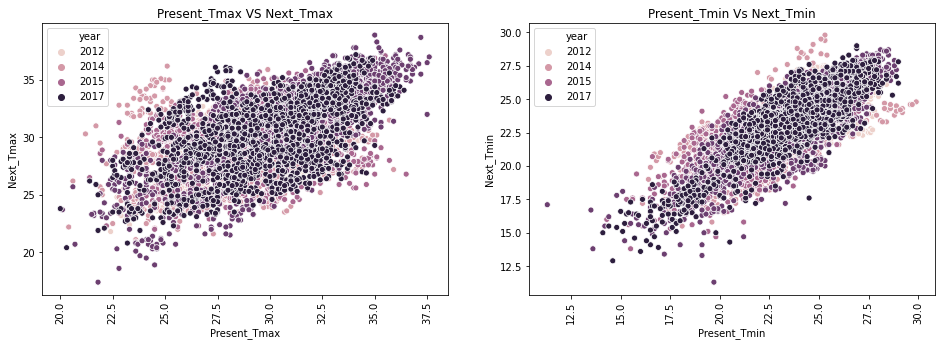

In [73]:
f=plt.figure(figsize=(16,5))
f.add_subplot(1,2,1)
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',hue='year',data=df1)
plt.xticks(rotation=90)
plt.title("Present_Tmax VS Next_Tmax")

f.add_subplot(1,2,2)
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',hue='year',data=df1)
plt.xticks(rotation=90)
plt.title("Present_Tmin Vs Next_Tmin")
plt.show()

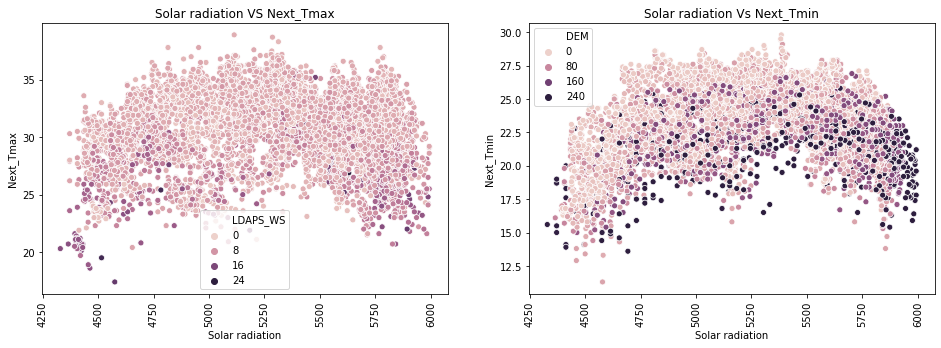

In [79]:
f=plt.figure(figsize=(16,5))
f.add_subplot(1,2,1)
sns.scatterplot(x='Solar radiation',y='Next_Tmax',hue='LDAPS_WS',data=df1)
plt.xticks(rotation=90)
plt.title("Solar radiation VS Next_Tmax")

f.add_subplot(1,2,2)
sns.scatterplot(x='Solar radiation',y='Next_Tmin',hue='DEM',data=df1)
plt.xticks(rotation=90)
plt.title("Solar radiation Vs Next_Tmin")
plt.show()

##### Solar radiation is parabolic in nature with maximum and minimum temperature. The increase in temp results increase in solar radiation while further increase in temperature will decrese solar radiation.

In [77]:
df1['year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: year, dtype: int64

Skewness of station = -0.00
Skewness of Present_Tmax = -0.26
Skewness of Present_Tmin = -0.35
Skewness of LDAPS_RHmin = 0.30
Skewness of LDAPS_RHmax = -0.85
Skewness of LDAPS_Tmax_lapse = -0.22
Skewness of LDAPS_Tmin_lapse = -0.57
Skewness of LDAPS_WS = 1.55
Skewness of LDAPS_LH = 0.66
Skewness of LDAPS_CC1 = 0.46
Skewness of LDAPS_CC2 = 0.47
Skewness of LDAPS_CC3 = 0.64
Skewness of LDAPS_CC4 = 0.66
Skewness of LDAPS_PPT1 = 5.31
Skewness of LDAPS_PPT2 = 5.71
Skewness of LDAPS_PPT3 = 6.36
Skewness of LDAPS_PPT4 = 6.68
Skewness of lat = 0.09
Skewness of lon = -0.29
Skewness of DEM = 1.72
Skewness of Slope = 1.56
Skewness of Solar radiation = -0.52
Skewness of Next_Tmax = -0.33
Skewness of Next_Tmin = -0.39
Skewness of year = 0.01
Skewness of month = -0.70


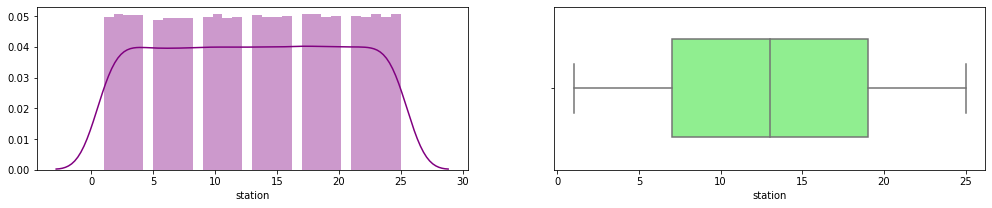

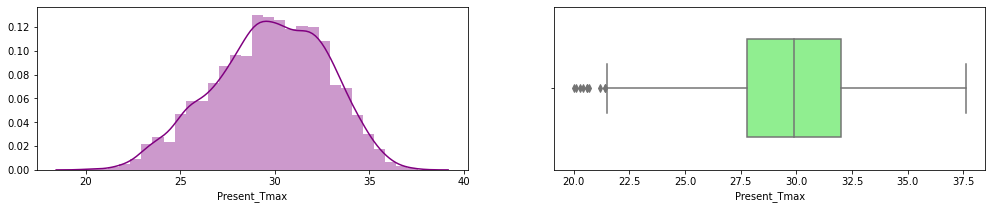

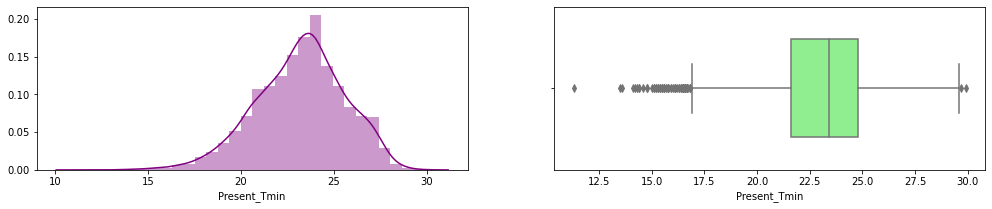

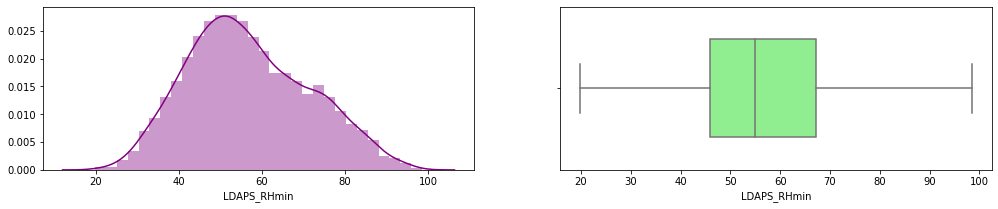

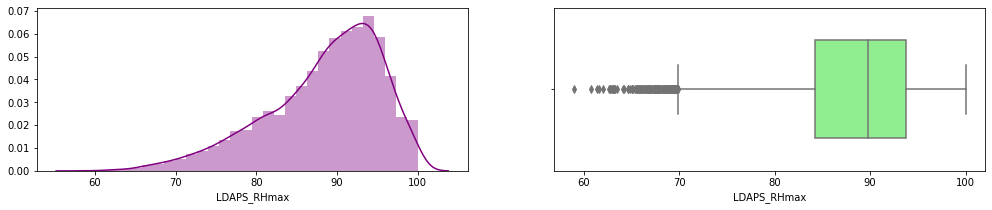

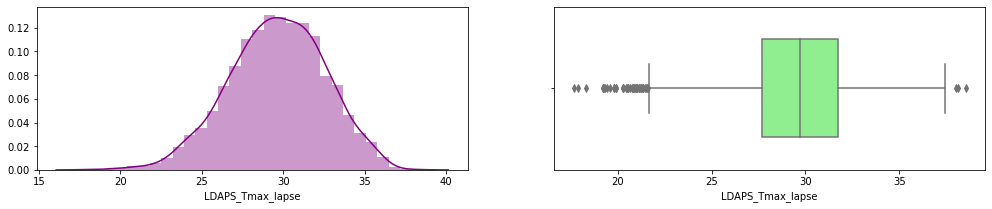

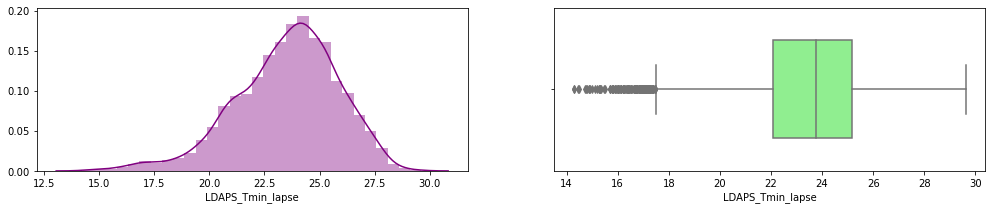

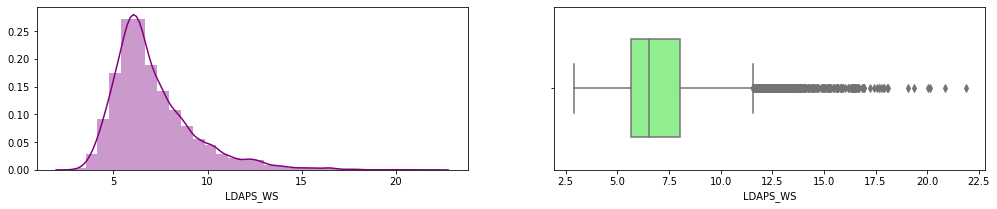

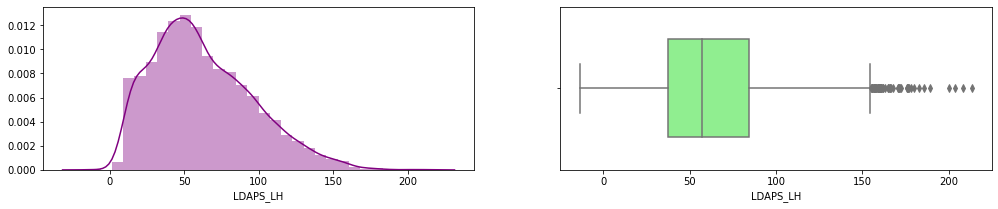

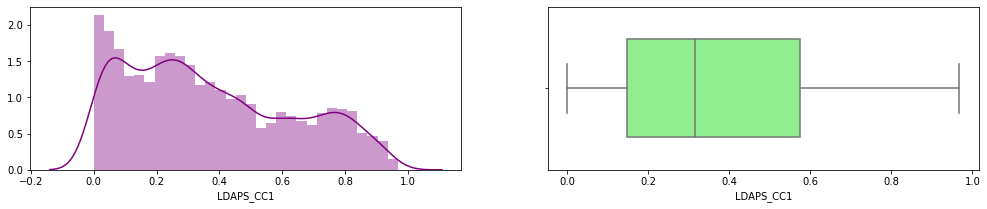

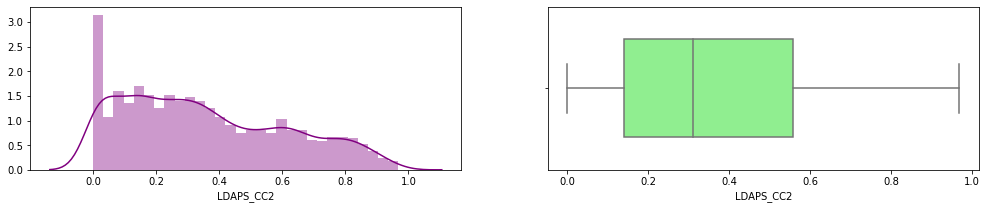

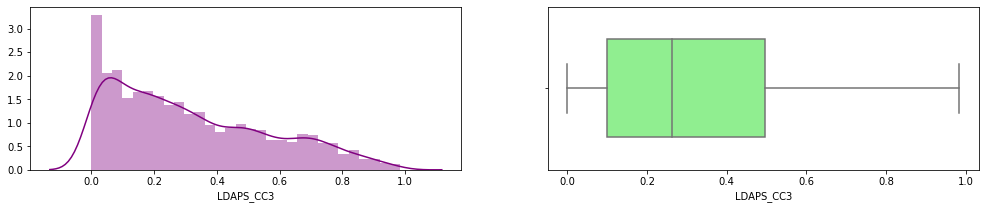

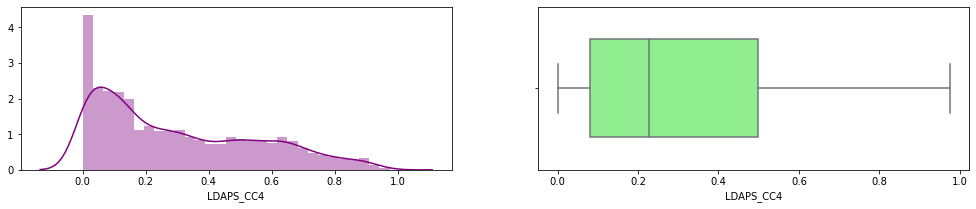

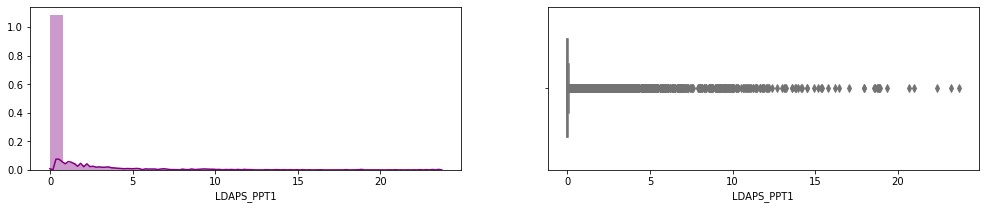

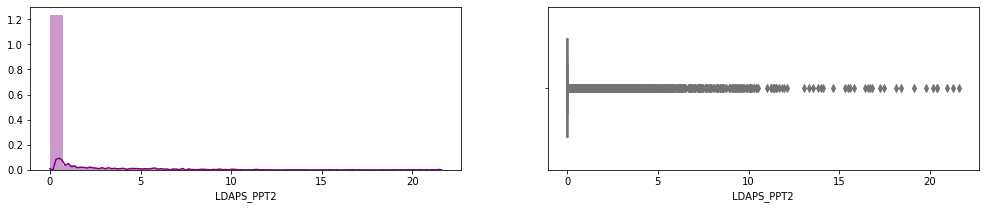

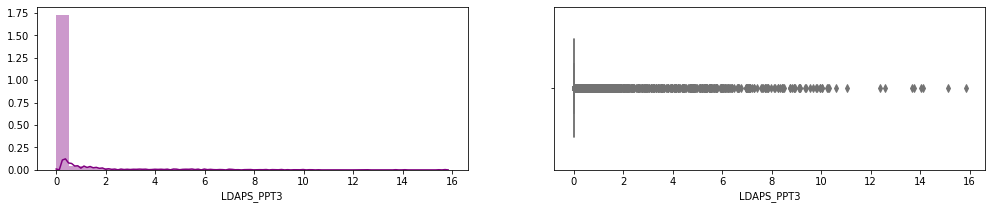

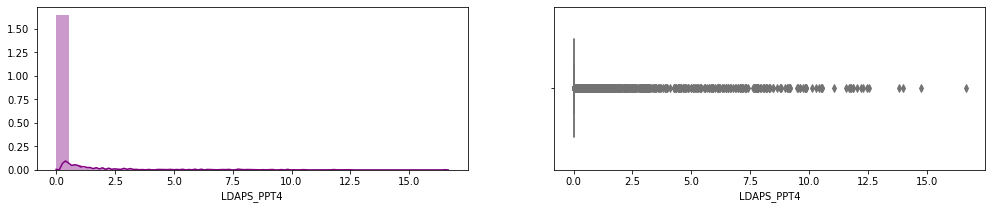

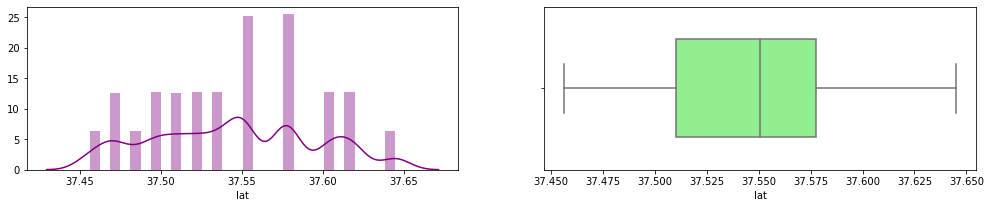

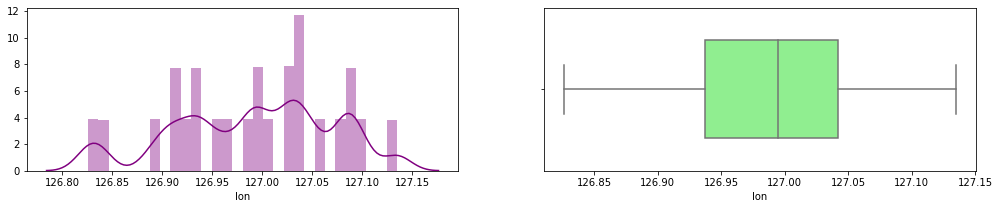

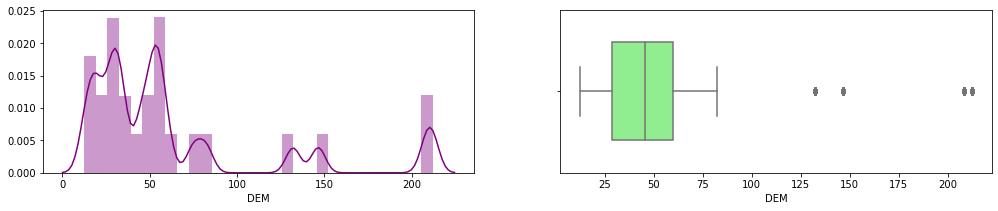

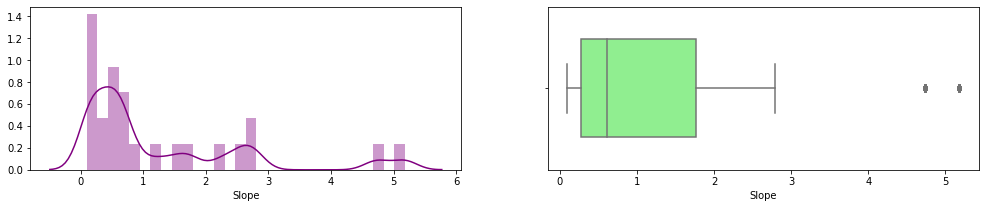

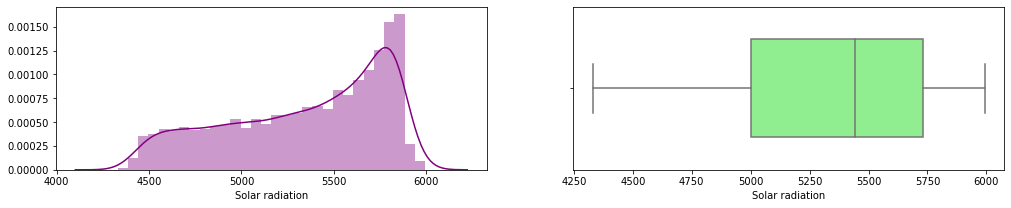

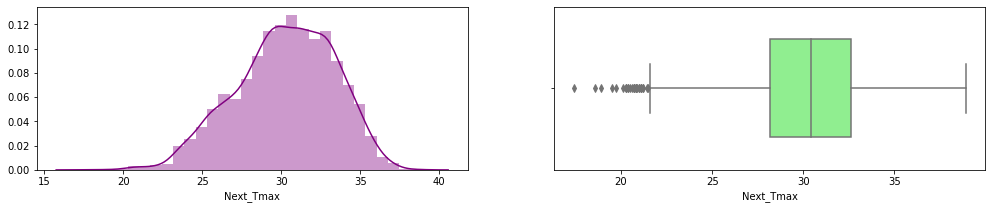

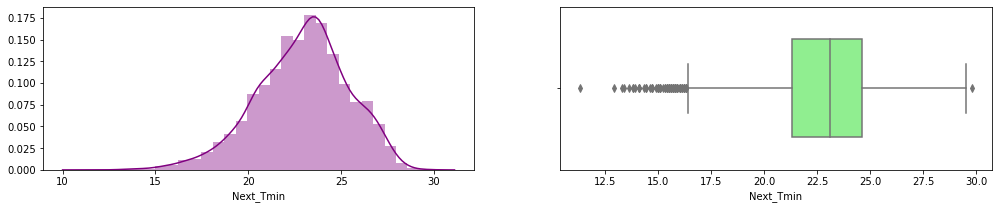

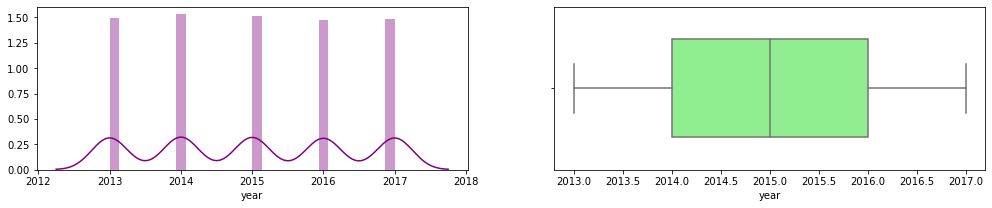

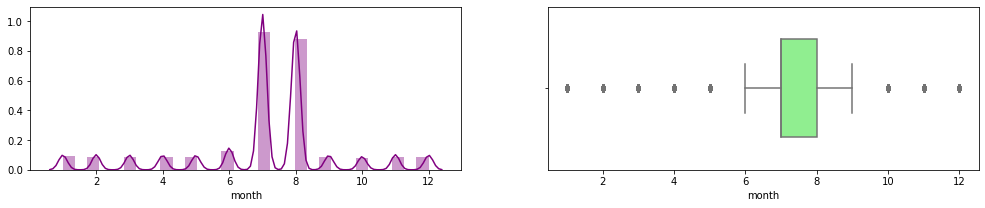

In [81]:
for i in df1.columns:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df1[i],bins=30,color='purple')
    f.add_subplot(1,2,2)
    sns.boxplot(df1[i],color='lightgreen',saturation=1.5,
    width=0.6)
    print('Skewness of %s = %0.2f' %(i, df1[i].skew()))

###### Present_Tmax,Present_Tmin,LDAPS_RHmax, LDAPS_Tmax_lapse ,and some more coolumns are having presence of outliers and skewness.

In [82]:
df1.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
year                0.013575
month              -0.703092
dtype: float64

###### A lot of features contians high value of skewness ,they are having outliers as well, so before removing skewness we are going to remove outliers.

In [83]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [84]:
df_new=df1[(z<3).all(axis=1)]

In [85]:
print("Shape before outliers removal ",df1.shape)
print()
print("Shape after outliers removal ",df_new.shape)

Shape before outliers removal  (7588, 26)

Shape after outliers removal  (6739, 26)


In [86]:
print("Percentage loss of data treating null values",round((len(df1)-len(df_new))/len(df1)*100,2),"%")

Percentage loss of data treating null values 11.19 %


### Splitting data into independent and dependent features

In [87]:
x=df_new.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=pd.concat([df_new['Next_Tmax'], df_new['Next_Tmin']], axis=1)

In [88]:
print("Independent variabales shape - ",x.shape)
print("Dependent variables shape - ",y.shape)

Independent variabales shape -  (6739, 24)
Dependent variables shape -  (6739, 2)


In [90]:
features=x.columns

In [91]:
from sklearn.preprocessing import StandardScaler
# Instantiate and scale the data
sc=StandardScaler()
x=sc.fit_transform(x)

In [92]:
x=pd.DataFrame(x,columns=features)

In [93]:
x.head(4)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,year,month
0,-1.672719,-0.425704,-0.814460,0.195915,0.437537,-0.662498,-0.289928,-0.020735,0.225115,-0.440130,-0.526550,-0.568017,-0.614602,-0.341277,-0.277993,-0.258829,-0.237604,1.211166,0.002925,2.828736,1.143153,1.543068,-1.421473,-0.479519
1,-1.533959,0.690215,-0.727785,-0.236604,0.364239,-0.016693,0.171379,-0.631488,-0.298746,-0.473686,-0.327568,-0.577779,-0.628231,-0.341277,-0.277993,-0.258829,-0.237604,1.211166,0.518733,-0.304406,-0.536509,1.249502,-1.421473,-0.479519
2,-1.395198,0.585598,0.008945,-0.494494,-0.585732,0.070769,0.409475,-0.389607,-1.236867,-0.537958,-0.303886,-0.384307,-0.566924,-0.341277,-0.277993,-0.258829,-0.237604,0.671467,0.845830,-0.518594,-0.719941,1.235827,-1.421473,-0.479519
3,-1.256438,0.725088,0.052282,0.194767,1.206456,-0.069787,-0.146681,-0.654162,0.113709,-0.510012,-0.434669,-0.570355,-0.600463,-0.341277,-0.277993,-0.258829,-0.237604,2.018714,0.392926,-0.286576,0.958094,1.220170,-1.421473,-0.479519


### Splitting data into training and testing

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [95]:
#Checking the shape

print(X_train.shape,'\t\t',X_test.shape)

(4717, 24) 		 (2022, 24)


In [96]:
#Checking the shape

print(Y_train.shape,'\t',Y_test.shape)

(4717, 2) 	 (2022, 2)


In [97]:
# function for checking best random state
def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3,random_state=42)
        reg.fit(X_train,Y_train)
        pred=reg.predict(X_test)
        r2score=r2_score(Y_test,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state

In [98]:
# Using GridSearchCV to select best parameter for the models
kn=KNeighborsRegressor()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gdk=GridSearchCV(kn,parameters)
gdk.fit(X_train,Y_train)
gdk.best_params_

{'n_neighbors': 5}

In [99]:
# Using GridSearchCV 
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(X_train,Y_train)
gdd.best_params_

{'criterion': 'mse'}

In [101]:
# Using GridSearchCV 
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(X_train,Y_train)
gdls.best_params_

{'alpha': 0.001}

In [102]:
# Using GridSearchCV
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(X_train,Y_train)
grd.best_params_

{'alpha': 1}

In [104]:
# Using GridSearchCV 
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(X_train,Y_train)
gdrf.best_params_

{'n_estimators': 200}

In [109]:
# Using GridSearchCV 
etr=ExtraTreesRegressor()
parameters={'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(etr,parameters)                                                                                                                                        
gdg.fit(X_train,Y_train)                                                                                                                                         
gdg.best_params_

{'n_estimators': 500}

In [112]:
Lr=LinearRegression()
dt=DecisionTreeRegressor(criterion='mse')
kn=KNeighborsRegressor(n_neighbors = 5)
ls=Lasso(alpha= 0.001)
rd=Ridge(alpha=1)
rf=RandomForestRegressor(n_estimators = 200)
etr=ExtraTreesRegressor(n_estimators= 500)

In [113]:
models=[]
models.append(('LinearRegression',Lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('KNeighborsRegressor',kn))
models.append(('Lasso',ls))
models.append(('Ridge',rd))
models.append(('RandomForestRegressor',rf))
models.append(('ExtraTreesRegressor',etr))

In [115]:
Model=[]
score= []
mean_abs_e=[]
mean_sqr_e=[]
r2=[]
cv_score=[]
for name,model in models:
    print("~~~~~~~~******~~~~~~~~~~~",name,"~~~~~~~~~~******~~~~~~~~~~~~")
    
    Model.append(name)
    print("\n")
    model.fit(X_train,Y_train)
    print(model)
    sc=model.score(X_train,Y_train)
    print("Training score is -> ",sc*100)
    score.append(sc*100)
    pred=model.predict(X_test)
    mse=mean_squared_error(Y_test,pred)
    print("Root Mean squared error",np.sqrt(mse))
    mean_sqr_e.append(np.sqrt(mse))
    print("R2 score",r2_score(Y_test,pred))
    r2.append((r2_score(Y_test,pred))*100)
    soc=cross_val_score(model,x,y,cv=5).mean()
    print("Cross validation score",soc*100)
    cv_score.append(soc*100)
    print()

~~~~~~~~******~~~~~~~~~~~ LinearRegression ~~~~~~~~~~******~~~~~~~~~~~~


LinearRegression()
Training score is ->  79.88315371289887
Root Mean squared error 1.259440199037691
R2 score 0.7800676889906606
Cross validation score 71.96331675392662

~~~~~~~~******~~~~~~~~~~~ DecisionTreeRegressor ~~~~~~~~~~******~~~~~~~~~~~~


DecisionTreeRegressor()
Training score is ->  100.0
Root Mean squared error 1.3949614362076213
R2 score 0.7232059244829979
Cross validation score 45.118120328925116

~~~~~~~~******~~~~~~~~~~~ KNeighborsRegressor ~~~~~~~~~~******~~~~~~~~~~~~


KNeighborsRegressor()
Training score is ->  90.62931596839597
Root Mean squared error 1.0301247847740282
R2 score 0.8507451057318909
Cross validation score 53.65352525706724

~~~~~~~~******~~~~~~~~~~~ Lasso ~~~~~~~~~~******~~~~~~~~~~~~


Lasso(alpha=0.001)
Training score is ->  79.88237781388847
Root Mean squared error 1.2593064885227776
R2 score 0.7801057975750089
Cross validation score 72.02440803705204

~~~~~~~~******~~~~~~~~~

In [116]:
result = pd.DataFrame({'Model':Model,'Score':score,'R2_score':r2,'cross_val_score':cv_score})
result

,Model,Score,R2_score,cross_val_score
0,LinearRegression,79.883154,78.006769,71.963317
1,DecisionTreeRegressor,100.000000,72.320592,45.118120
2,KNeighborsRegressor,90.629316,85.074511,53.653525
3,Lasso,79.882378,78.010580,72.024408
4,Ridge,79.883146,78.006718,71.967655
5,RandomForestRegressor,98.505188,88.652030,70.273048
6,ExtraTreesRegressor,100.000000,91.069332,71.357466


###### Comparing various algorithim we find that Lasso and Ridge are far better than other algorithims. So we are using any one of these two for our model building.

In [117]:
# Lasso best random state
max_r2_score(ls,x,y)

The maximum r2 score 0.7801057975750089 is achieved at r_state 42


42

In [133]:
# Using best random state
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3,random_state=42)
ls=Lasso(alpha= 0.001)
ls.fit(X_train,Y_train)
pred=ls.predict(X_test)
r2score=r2_score(Y_test,pred)
cv=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("Lasso R2 score is", r2score)
print("Lasso cross val score is", cv)

Lasso R2 score is 0.7801057975750089
Lasso cross val score is 0.7202440803705205


In [135]:
# Ridge best random state
max_r2_score(rd,x,y)

The maximum r2 score 0.7800671817242534 is achieved at r_state 42


42

In [136]:
# Using best random state
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.3,random_state=42)
rd=Ridge(alpha= 0.001)
rd.fit(X_train,Y_train)
pred=rd.predict(X_test)
r2score=r2_score(Y_test,pred)
cv=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("Ridge R2 score is", r2score)
print("Ridge cross val score is", cv)

Ridge R2 score is 0.7800676885672166
Ridge cross val score is 0.719633211081038


##### Both are working well with almost same accuracy , So we are choosing Lasso algorithm for our model building.

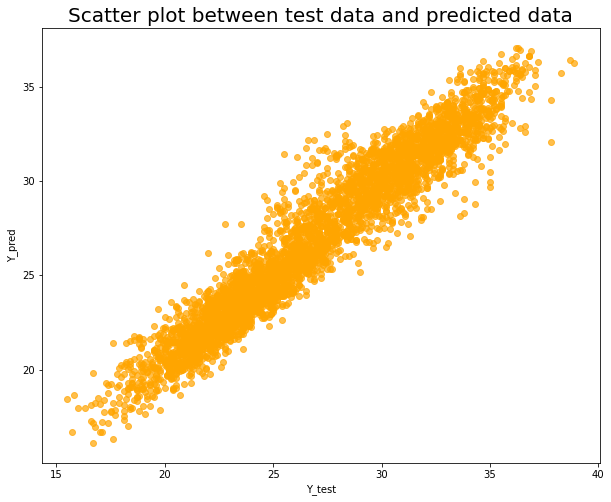

In [140]:
#Scatter plot between test data and prediction 
plt.figure(figsize=(10,8))
plt.scatter(Y_test, ls.predict(X_test), alpha = 0.7,color='orange')
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=20)
plt.show()

### Saving model

In [141]:
import joblib
filename='temperature_forecasting.obj'
joblib.dump(ls,filename)

['temperature_forecasting.obj']